In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-ours.pkl", "rb") as pkl:
    data = pickle.load(pkl)

data = data.assign(rpp_minus_alpha=data.rpp - data.alpha)
data

,key,protocol,maximum_height,maximum_size,model_hum,protocol_hum,time,n_states,n_actions,n_transitions,...,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,ptrev,rpp_minus_alpha
0,eth-3-ms-9,ethereum-wp-3,0,9,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),211.678285,129135,8,455184,...,37.306754,42.674361,1253,1253,0.141882,0.390253,2,0.428579,37.403798,1.402534e-01
1,eth-3-ms-9,ethereum-wp-3,0,9,sm.SelfishMining(EthereumWhitepaper(horizon=3)...,EthereumWhitepaper(horizon=3),211.678285,129135,8,455184,...,43.826217,48.693927,1243,1243,0.145916,0.455100,2,0.440710,43.883912,1.550999e-01
2,par-3-ms-13,parallel-3,0,13,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),443.104335,156965,10,852290,...,68.239950,74.850464,2116,2116,0.572593,0.684501,2,0.772964,69.887946,2.345010e-01
3,byz-2-ms-10,ethereum-bz-2,0,10,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),298.553273,160541,6,590449,...,26.923266,34.342451,2278,2278,0.748234,0.287609,2,0.787762,27.544702,3.760925e-02
4,eth-2-ms-10,ethereum-wp-2,0,10,sm.SelfishMining(EthereumWhitepaper(horizon=2)...,EthereumWhitepaper(horizon=2),295.625834,161164,7,592668,...,30.325170,37.477775,1920,1920,0.430096,0.349921,2,0.665284,30.816901,9.992091e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,btc-ms-22,bitcoin,0,22,"sm.SelfishMining(Bitcoin(), alpha=0.125, gamma...",Bitcoin(),642.193976,153461,4,814984,...,24.007256,43.053936,394,394,0.008824,0.250000,2,0.143515,24.017183,3.650691e-12
212,byz-3-ms-9,ethereum-bz-3,0,9,"sm.SelfishMining(EthereumByzantium(horizon=3),...",EthereumByzantium(horizon=3),218.417944,129075,8,455098,...,52.852758,57.165327,960,960,0.075550,0.552786,2,0.330338,53.263760,1.027859e-01
213,byz-2-ms-10,ethereum-bz-2,0,10,"sm.SelfishMining(EthereumByzantium(horizon=2),...",EthereumByzantium(horizon=2),298.553273,160541,6,590449,...,50.557033,56.616490,1517,1517,0.235262,0.527524,2,0.524132,51.424855,1.275242e-01
214,par-3-ms-13,parallel-3,0,13,"sm.SelfishMining(Parallel(k=3), alpha=0.125, g...",Parallel(k=3),443.104335,156965,10,852290,...,62.027684,69.285452,913,913,0.058200,0.648116,2,0.324437,63.433088,2.481165e-01


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0].drop(columns=["model_hum", "protocol_hum"])

,key,protocol,maximum_height,maximum_size,time,n_states,n_actions,n_transitions,alpha,gamma,...,vi_start_value,vi_max_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time,ptrev,rpp_minus_alpha


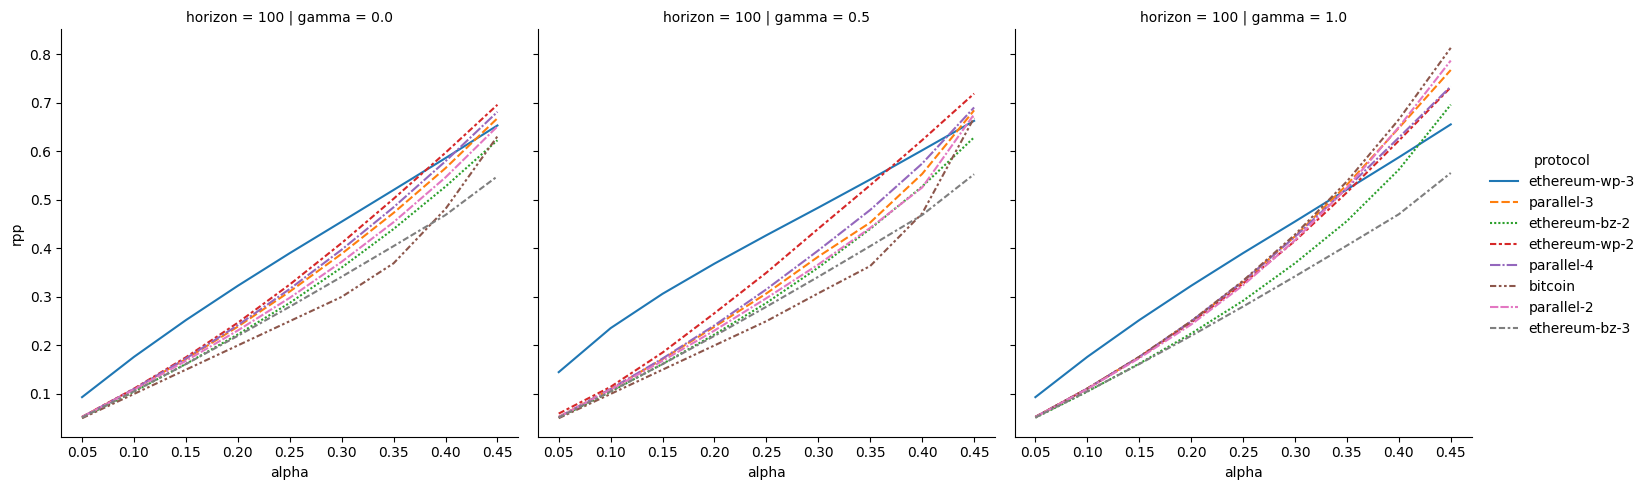

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

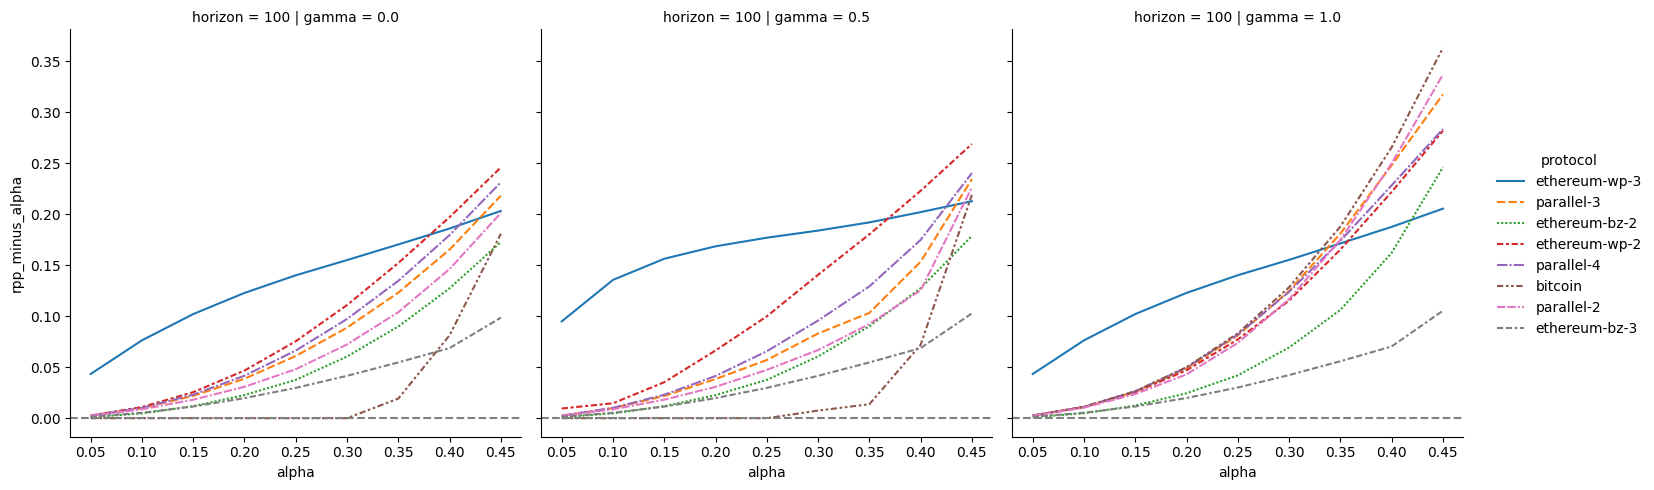

In [5]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    kind="line",
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
).refline(y=0)

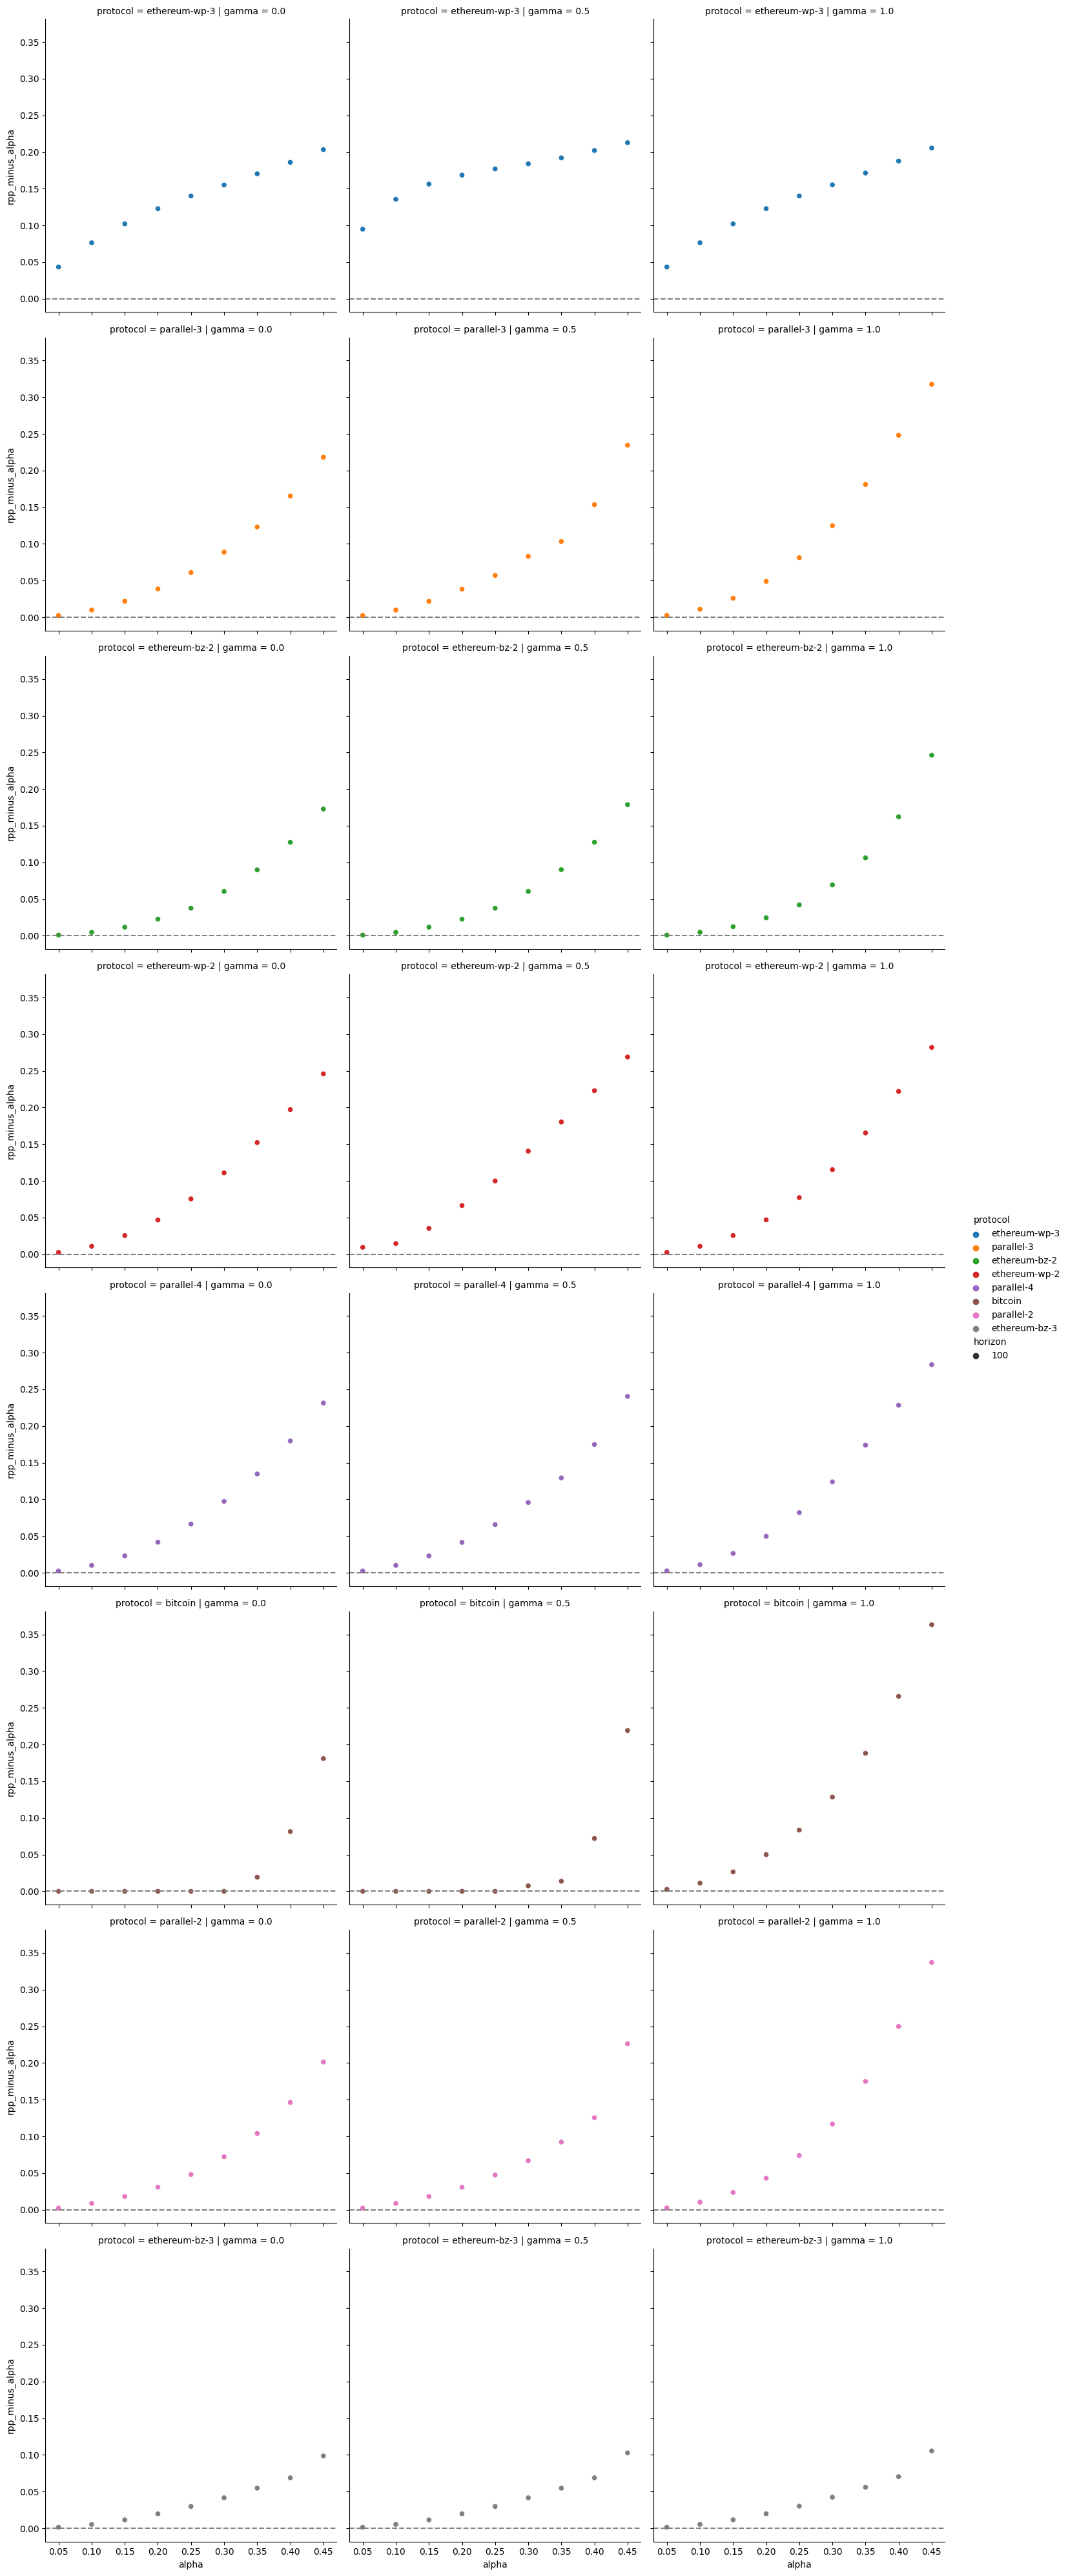

In [6]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="rpp_minus_alpha",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
).refline(y=0)

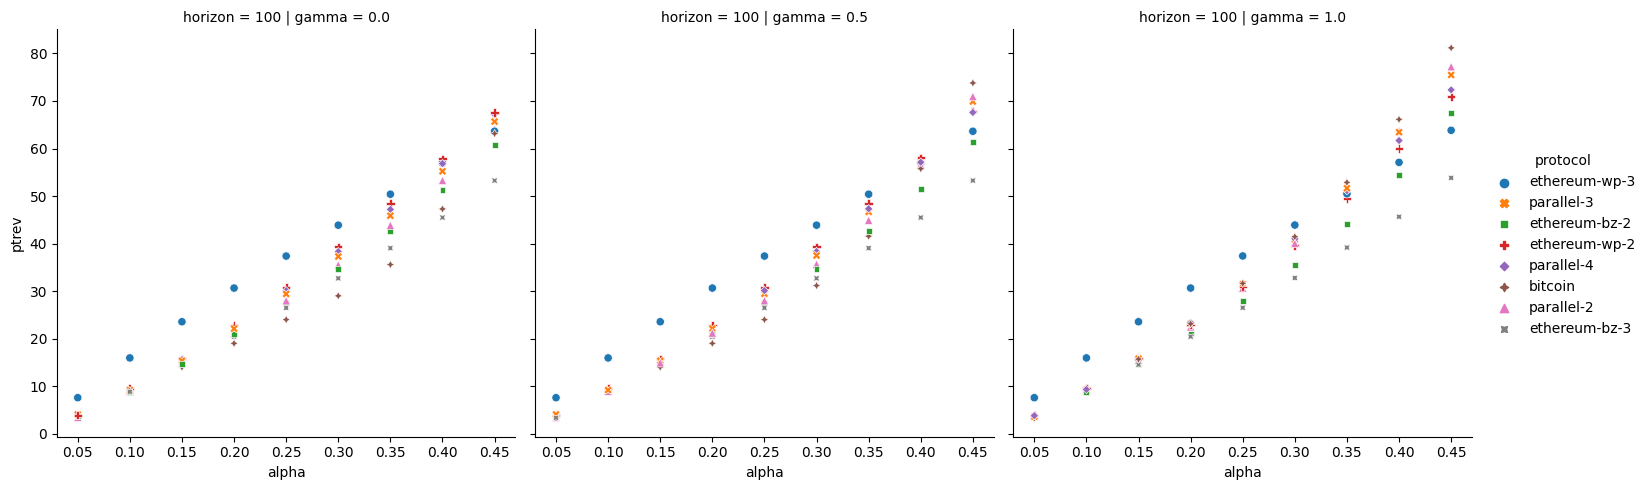

In [7]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="ptrev",
    col="gamma",
    row="horizon",
    hue="protocol",
    style="protocol",
)

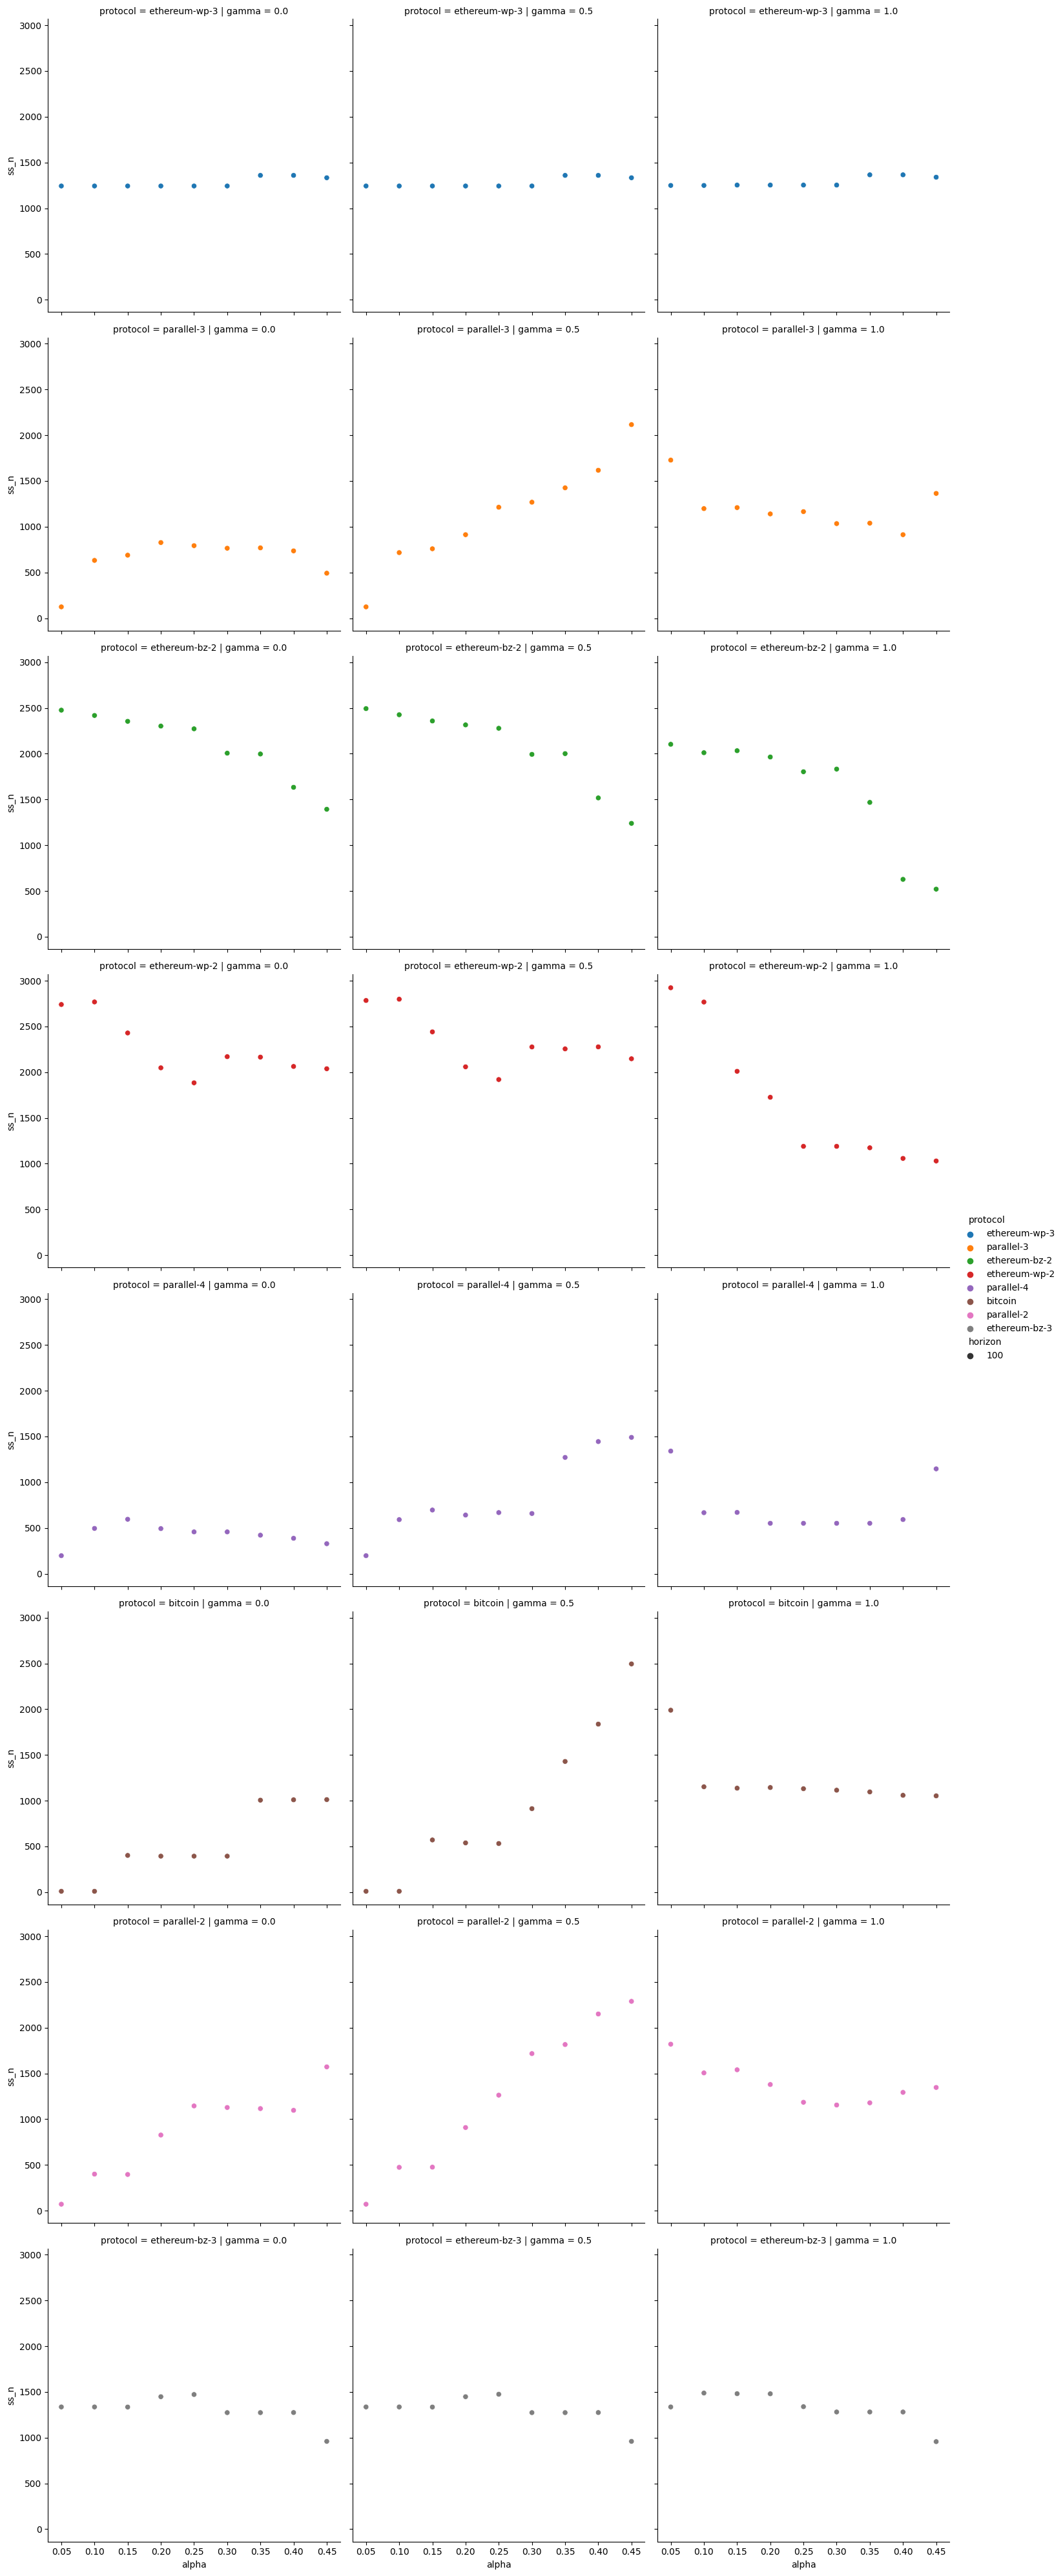

In [8]:
# Compare policy size
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="protocol",
    hue="protocol",
    style="horizon",
)